<a href="https://colab.research.google.com/github/chaitanya586/Flower-classification-/blob/main/flower%20iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [31]:
# Load the Iris dataset
data = load_iris()
X = data.data[:, :2]  # considering only the first two features (sepal length and sepal width)
y = data.target

In [32]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Training the Support Vector Machine classifier
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [34]:
# Making predictions
y_pred = clf.predict(X_test)

In [35]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [37]:
#Printing the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [38]:
# Plotting the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


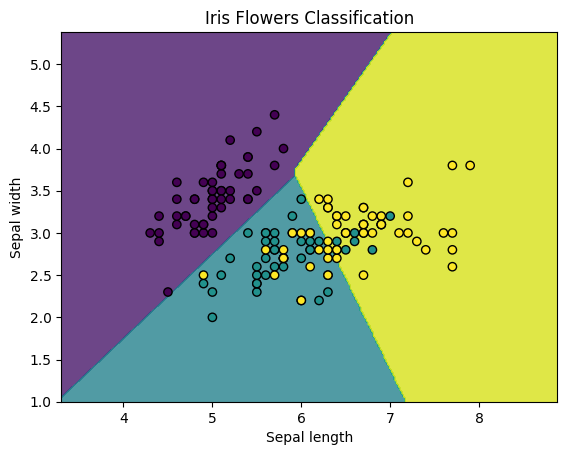

In [39]:
# Plotting the decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.show()

plot_decision_boundary(X, y, clf, 'Iris Flowers Classification')